## Mode de prélevement PESR (Probabilités égales sans remise).
Etude du caractère Y dans une population de 5 individus.
**Les données de l'exercice sont présentés ci dessous**:

In [81]:
import pandas as pd
import numpy as np
df = pd.read_excel('Data_Exo1_Sondage.xlsx')
df

,id,Y
0,1,3
1,2,4
2,3,6
3,4,8
4,5,13


## La moyenne de la population Y_U (première methode de facilité).

$$1/N\sum\limits_{j=1}^{N}y_{j}$$

In [82]:
moyenne_population = df['Y'].mean()
print('la moyene de la population est: ', moyenne_population)

la moyene de la population est:  6.8


## Une autre méthode de calcul

In [83]:
moyenne_pop = sum(df.Y/N)
moyenne_pop

6.799999999999999

## Le taux de sondage etant f = n/N 

La formule:
\begin{equation}
f = n/N 
\end{equation}

In [84]:
n = 2 # Prélevement de deux individus $$1/N\sum\limits_{j=1}^{N}y_{j}$$
N = 5
f = n/N
print('le taux de sondage est: ', f)

le taux de sondage est:  0.4


## La variance et l'ecart-type corrigés

La variance etant : $$ 1/(N-1)\sum\limits_{j=1}^{N}(y_{j}-y_{mo})^2$$

In [85]:
W = (df['Y']-df['Y'].mean())**2
var_corrigé = sum(W)/(N-1)
ecart_type = var_corrigé**(1/2) ## l'ecart type est la racine carrée de la variance

In [86]:
ecart_type

3.96232255123179

## Calcul manuel

In [87]:
var_corrigé = sum((df['Y'] - moyenne_population)**2)/(N-1)
np.sqrt(var_corrigé)


3.96232255123179

## Le nombre d'echantillons possibles vu le mode de prélèvement.

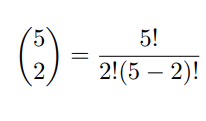

In [88]:
from math import * 
combi_possi = factorial(5)/(factorial(2)*factorial(5-2))
print('le nombre de combinaisons possibles vu le mode de prélevement est: ', combi_possi)

le nombre de combinaisons possibles vu le mode de prélevement est:  10.0


## La variance de la moyenne de l'echantillon

$$ var(y_{w_mo}) = (1-f)s^2/n $$ **<i>s etant l'ecart-type de la population.<i>**

In [91]:
var_echantillon = ((1-f)*var_corrigé)/n
print("La variance de l'echantillon est: ", var_echantillon)

La variance de l'echantillon est:  4.71


## Calcul du quantile d'ordre $\alpha$ de la loi normale centrée réduite avec scipy.

In [92]:
import scipy.stats as stat

$z_{\alpha/2}$

In [94]:
z_alpha_demi = stat.norm.ppf(0.975,loc=0,scale=1)
print("le quantile d'ordre 1 - alpha/2 de la loi normale centrée réduite est: ", z_alpha_demi)

le quantile d'ordre 1 - alpha/2 de la loi normale centrée réduite est:  1.959963984540054


## Intevalle de confiance au niveau 95%
    soit l'echantillon {0,1} s'associant respectivement au valeurs y1 = 3 et y2 = 4 
    La moyenne de l'echantillon etant:
$$1/n\sum\limits_{j=1}^{n}y_{j}$$
    

In [95]:
moyenne_ech = (3+4)/2
IC = []
a= moyenne_ech - z_alpha_demi*var_echantillon
b= moyenne_ech + z_alpha_demi*var_echantillon
IC.append(a)
IC.append(b)
IC

[-5.731430367183654, 12.731430367183654]

In [96]:
def IC(L,µ,n,niveau):
    import scipy.stats as stat
    import numpy as np
    N = len(L)
    data = np.array(L)
    sigma = ((1-n/N)*data.var())/n
    a = µ - stat.norm.ppf(niveau, loc=0, scale=1)*np.sqrt(sigma)
    b = µ + stat.norm.ppf(niveau, loc=0, scale=1)*np.sqrt(sigma)
    print('[',a,',',b,']')
 

In [97]:
IC([3,4,6,8,13] , 3.5,2, 0.95 )

[ 0.3071192106451086 , 6.692880789354891 ]


## Exercice 2


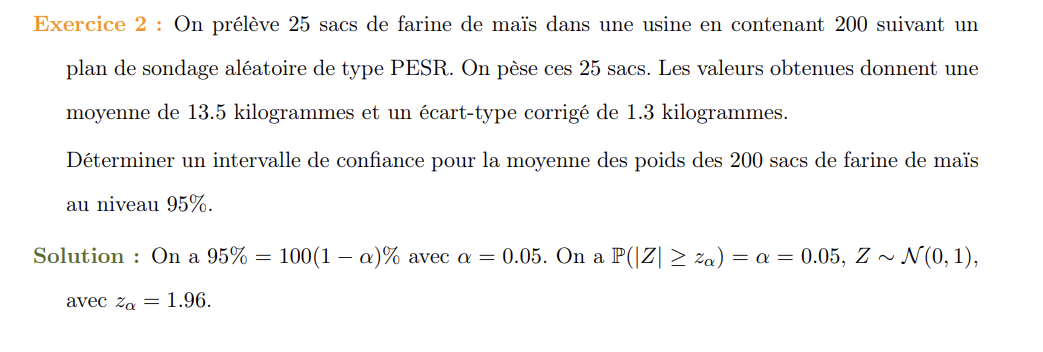

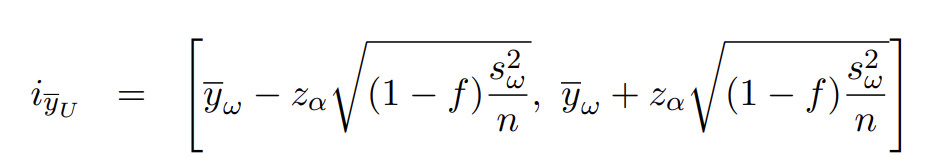

In [98]:
def IC_(s,µ,N,n,niveau):
    import scipy.stats as stat
    import numpy as np
    sigma = ((1-n/N)*(s**2))/n
    a = µ - stat.norm.ppf(niveau, loc=0, scale=1)*np.sqrt(sigma)
    b = µ + stat.norm.ppf(niveau, loc=0, scale=1)*np.sqrt(sigma)
    print('[',a,',',b,']')

In [99]:
IC_(1.3, 13.5, 200, 25, 0.95)

[ 13.099958882976082 , 13.900041117023918 ]


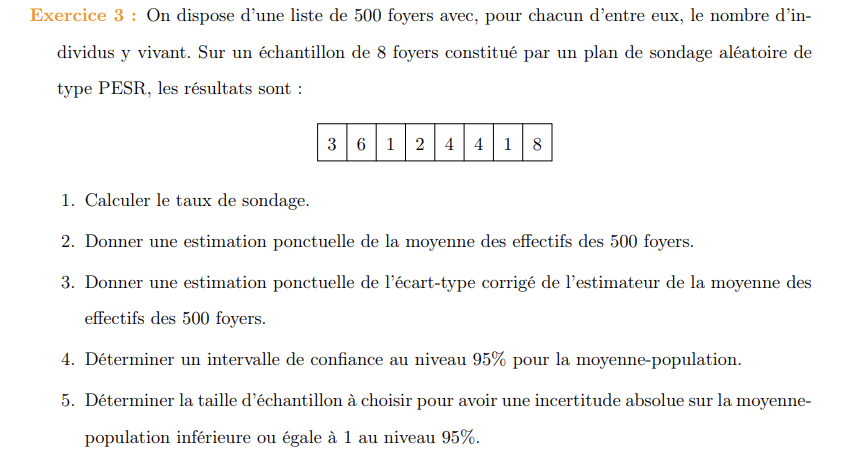

In [100]:
## Question 1/
def taux_sondage(n,N):
    return n/N
taux_sondage(8,500)

0.016

In [101]:
## Question 2/
L = [3,6,1,2,4,4,1,8]
np.array([L]).mean()

3.625

In [102]:
def estimation_variance_moyenne_ech(liste, n , N):
    a = np.array(liste).var()
    var =  (1/n)*(1-taux_sondage(n,N))*a
    print("variance de la moyenne d'echantillon est: ",var,"\n","ecart-type de la moyenne d'echantillon est:   ", np.sqrt(var))

In [103]:
def estim_variance_moyenne_ech(liste, n , N):
    a = np.array(liste).var()
    return  (1/n)*(1-taux_sondage(n,N))*a
  

In [104]:
a = np.array(L).var()
a

5.234375

In [105]:
estimation_variance_moyenne_ech(L,8,500)

variance de la moyenne d'echantillon est:  0.643828125 
 ecart-type de la moyenne d'echantillon est:    0.802389011016477


In [106]:
## Question 4
IC_(np.array(L).var(),3.625,500,25,0.95)

[ 1.9466447625671701 , 5.30335523743283 ]


In [107]:
def minimum_n(d0,N,L,niveau):
    s_ech_carr = np.array(L).var()
    z = stat.norm.ppf(niveau, loc=0, scale=1)
    a = (z**2)*(N)*(s_ech_carr)
    b = ((d0**2)*(N)) + ((z**2)*s_ech_carr)    
    return (a/b)  

In [108]:
minimum_n(1,500,[3,6,1,2,4,4,1,8], 0.95)

13.771762330734806

In [109]:
class Point:
    def __init__(self, abs, ord):
        self.x = abs
        self.y = ord
a = Point(2,3)
print("a.x = ", a.x)
print("a.y = ",a.y)

a.x =  2
a.y =  3


In [110]:
np.array(L).var()

5.234375

In [111]:
np.sqrt(np.array(L).var())

2.2878756522153907

In [112]:
df = pd.Series(L).to_frame()

In [113]:
df

,0
0,3
1,6
2,1
3,2
4,4
5,4
6,1
7,8


In [114]:
df.columns = ['Y']

In [115]:
df

,Y
0,3
1,6
2,1
3,2
4,4
5,4
6,1
7,8


In [116]:
df['(Y-Y_mo)'] = df.Y - df.Y.mean()

In [117]:
df

,Y,(Y-Y_mo)
0,3,-0.625
1,6,2.375
2,1,-2.625
3,2,-1.625
4,4,0.375
5,4,0.375
6,1,-2.625
7,8,4.375


In [118]:
variance_corrigé = df['(Y-Y_mo)']**2/(len(df['(Y-Y_mo)'])-1)

In [119]:
variance_corrigé.sum()

5.982142857142858